<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Regresión

Programa creado para mostrar ejemplos de como podría utilizar las regresiones en series temporales<br>
v1.1

# Machine Learning supervisado - Regresión

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Datos

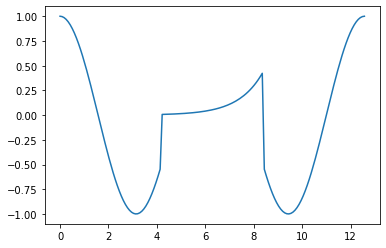

In [2]:
np.random.seed(0)

n_samples = 150
X = np.linspace(0, 4*np.pi, n_samples)
y1 = np.cos(X[:50])
y2 = np.exp(X[50:100]) * (0.0001)
y3 = np.cos(X[100:])
y = np.concatenate([y1, y2, y3])

plt.plot(X, y)
plt.show()

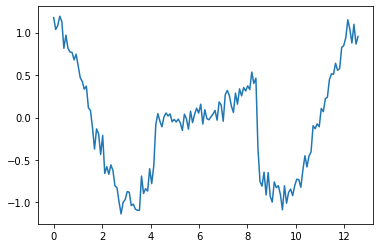

In [3]:
# Agregar ruido a los datos

# Sumemos ruido a las mediciones del gráfico
y_real = y + np.random.randn(len(y)) * 0.1

plt.plot(X, y_real)
plt.show()

## 2 - Modelo de regresión lineal por ventanas

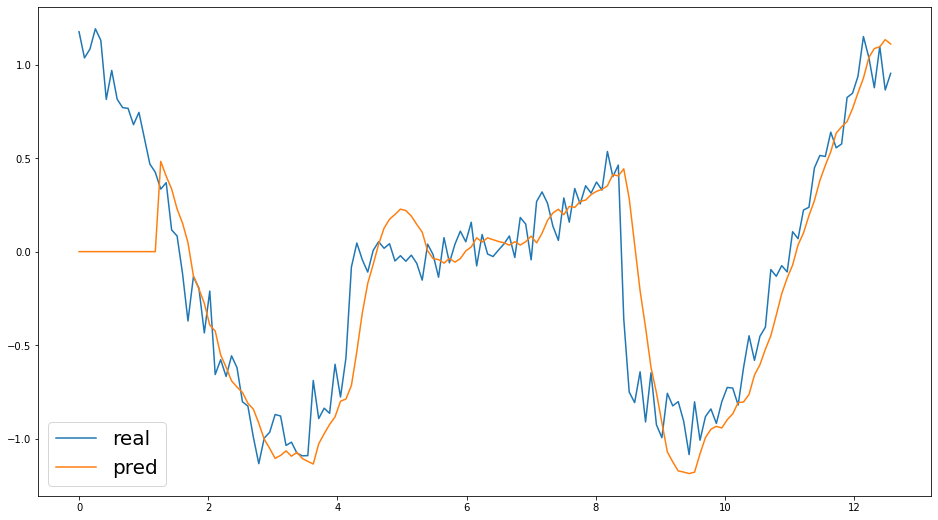

In [4]:
ventana = 15
y_hat = [0] * ventana

from sklearn.linear_model import LinearRegression

for i in range(ventana, len(X)):
    x_ventana = X[i-ventana:i]
    y_ventana = y_real[i-ventana:i]
   
    # Regresión lineal
    lr = LinearRegression()
    lr.fit(x_ventana.reshape(-1, 1), y_ventana)

    # Tomar el último elemento de la ventana
    ultimo_elemento = x_ventana[-1]

    #print(x_ventana, y_ventana, ultimo_elemento)

    # Realizar la prediccion
    pred = lr.predict(ultimo_elemento.reshape(-1, 1))[0]
    y_hat.append(pred)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.plot(X, y_real, label="real")
ax.plot(X, y_hat, label="pred")
ax.legend(prop={'size': 20})
plt.show()

## Conclusión
Cuanto mayor es la ventana más inmune a los ruidos son nuestras predicciones, pero más lento el sistema reacciona a los cambios bruscos de la serie temporal.\
Se suele utilizar diferentes modelos con diferentes ventanas y analizarlos en conjunto (uno para eliminar el ruido y otro para detectar cambios en tendencias). Este proceso se lo conoce también como __"cruce de medias"__.